In [61]:
import os, time, pickle

import numpy as np
np.random.seed(42)

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
# Data Attribute Information

# 1. Sample code number: id number 
# 2. Clump Thickness: 1 - 10 
# 3. Uniformity of Cell Size: 1 - 10 
# 4. Uniformity of Cell Shape: 1 - 10 
# 5. Marginal Adhesion: 1 - 10 
# 6. Single Epithelial Cell Size: 1 - 10 
# 7. Bare Nuclei: 1 - 10 
# 8. Bland Chromatin: 1 - 10 
# 9. Normal Nucleoli: 1 - 10 
# 10. Mitoses: 1 - 10 
# 11. Class: (2 for benign, 4 for malignant)

# Specifing header
header = ['sample_code','clump_tickness','uniformity_cell_size','uniformity_cell_shape',
          'marginal_adhesion','single_epithelial_cell_size','bare_nuclei','bland_chromatin',
          'normal_nucleoli','mitoses','target']

# Reading the data
folderName = '../data/' 
fileName   = 'breast-cancer-wisconsin.data'
model_file_name   = 'decisionTree_model.sav'

df = pd.read_csv(folderName+fileName,header=None,names=header)

# Printing some info about the data
print("[INFO]\nNrow: {}\nNcol: {}".format(df.shape[0],df.shape[1]))
df.head(2)

[INFO]
Nrow: 683
Ncol: 11


,sample_code,clump_tickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,target
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2


In [63]:
# Convert all columns to int or float to avoid errors
def conv2num(df):
    cols = df.columns
    for col in cols:
        try:
            df[str(col)] = df[str(col)].astype(float) # Remember to specify type according to data specification
        except Exception as e:
            print('Column \'{}\' was not converted. Error: \n'.format(col), e, '\n')
            pass
    return df

df = conv2num(df) # Converting columns to number to avoid errors

In [64]:
# Setting the target column
target = df.loc[:,df.columns[-1]].values

# If necessary, dropping cols
cols = df.columns # List of columns in dataframe
drop = [cols[-1],cols[0]] # List of columns to drop
df.drop(labels=drop,axis=1,inplace=True)
df.head(3)

,clump_tickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses
0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0
1,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0
2,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0


In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection
from sklearn import metrics

In [66]:
# Initialize the classifier
clf = DecisionTreeClassifier(criterion='entropy', max_depth=None, random_state=None)

# ----------- CROSS VALIDATION ----------- #
sc_mean_test=[]
sc_mean_train=[]

cv = model_selection.KFold(n_splits=10) # K-fold Cross Validation method
for train_index, test_index in cv.split(df.values):
    X_train, X_test = df.values[train_index,:], df.values[test_index,:]
    y_train, y_test = target[train_index],target[test_index]     
        
    clf.fit(X_train, y_train)
    predicted_train = clf.predict(X_train)
    sc_mean_train.append(metrics.accuracy_score(y_train, predicted_train))
    
    predicted_test = clf.predict(X_test)
    sc_mean_test.append(metrics.accuracy_score(y_test, predicted_test))

In [67]:
# Transforming list to array
sc_mean_test = np.array(sc_mean_test)
sc_mean_train = np.array(sc_mean_train)

# Calculating the mean values for train and test score
sc_mean_train.mean(), sc_mean_test.mean()

(1.0, 0.9385123614663258)

# Data Analysis

In [71]:
import graphviz, pydotplus
from IPython.display import Image
from sklearn import tree
from sklearn.externals.six import StringIO  

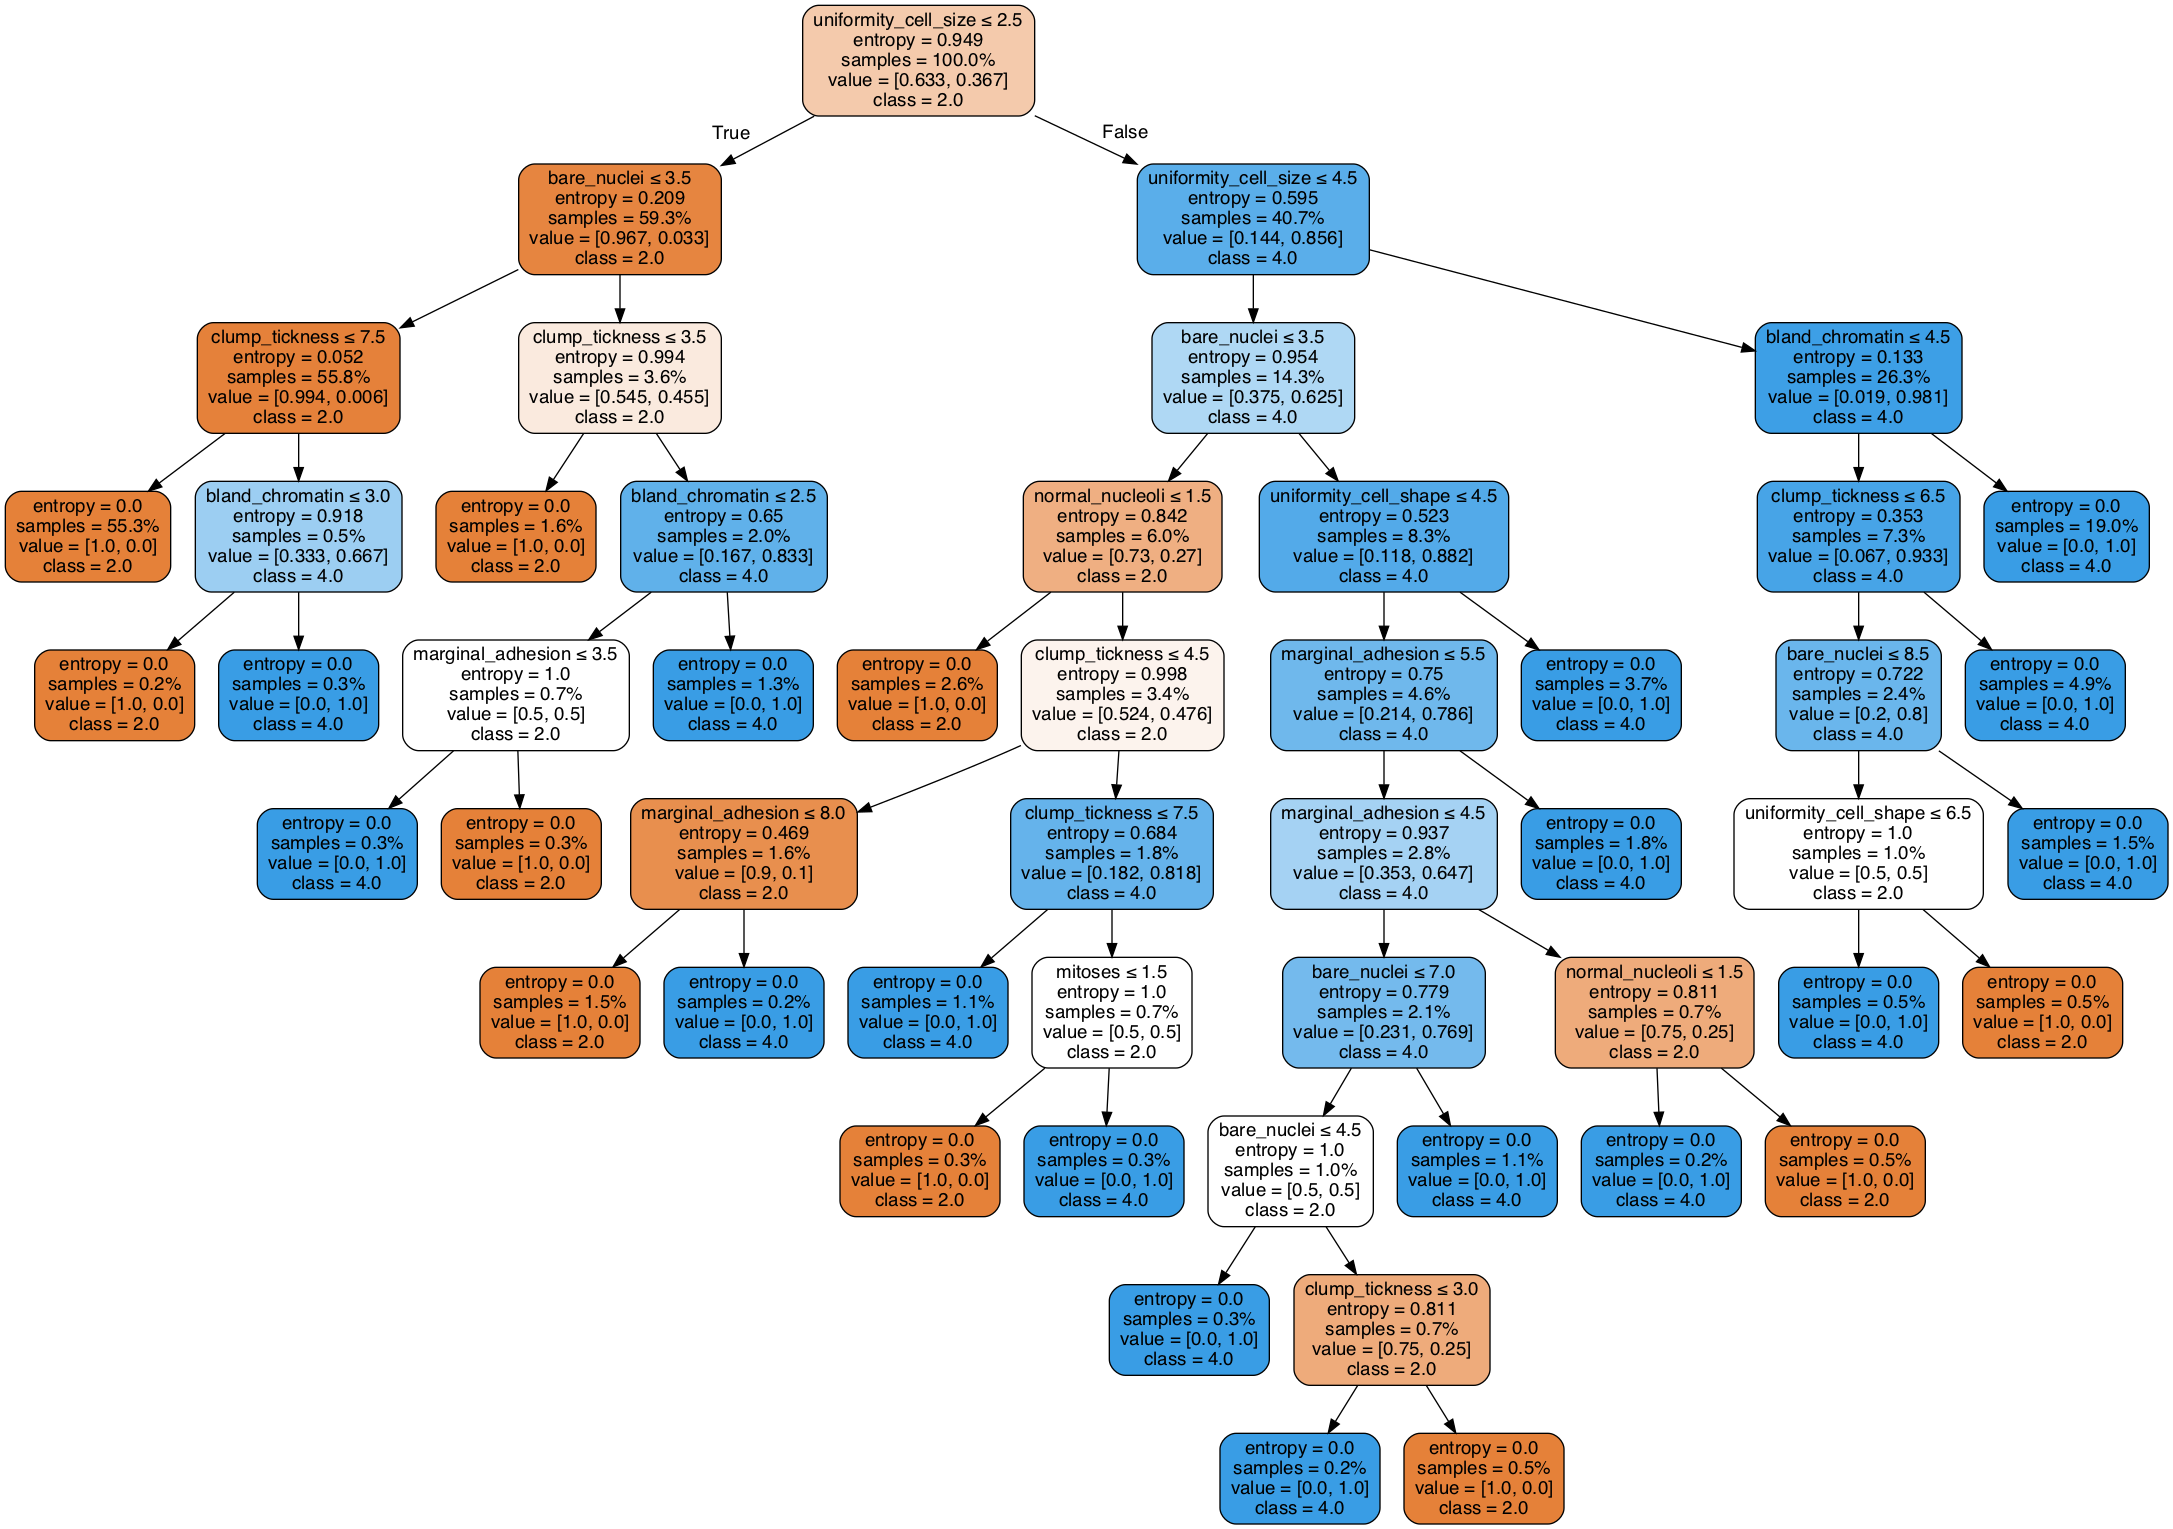

In [73]:
# Generating a IO object to receive the dot data
dot_data = StringIO()

# Exporting the dot data to the IO object 
tree.export_graphviz(clf, 
                     feature_names=df.columns,
                     class_names=[str(i) for i in set(target)],
                     filled=True, 
                     rounded=True, 
                     rotate=False,
                     proportion=True,
                     special_characters=True,
                     out_file=dot_data)

# Converting the dot data into a graph
dot = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Displaying the image in png format
Image(dot.create_png())